In [ ]:
## Business Questions
1. Which product categories generate the highest total sales?
2. Which sub-categories are the most profitable?
3. Which regions contribute the most to sales and profit?
4. Who are the top 10 customers by total sales?
5. Are there any loss-making product categories or sub-categories?
6. How do sales and profit change over time?
7. What is the average profit margin by category?
8. Which shipping modes are the most profitable?
9. How does discount impact profit?
10. Are there regions with high sales but low profit?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("/Users/adityasharan/Desktop/sales-profit-trend-analysis/data/superstore_dataset.csv",encoding="latin1")

In [3]:
df.head()

,ï»¿order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [5]:
df.shape

(9994, 19)

In [6]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿order_id    9994 non-null   object 
 1   order_date     9994 non-null   object 
 2   ship_date      9994 non-null   object 
 3   customer       9994 non-null   object 
 4   manufactory    9994 non-null   object 
 5   product_name   9994 non-null   object 
 6   segment        9994 non-null   object 
 7   category       9994 non-null   object 
 8   subcategory    9994 non-null   object 
 9   region         9994 non-null   object 
 10  zip            9994 non-null   int64  
 11  city           9994 non-null   object 
 12  state          9994 non-null   object 
 13  country        9994 non-null   object 
 14  discount       9994 non-null   float64
 15  profit         9994 non-null   float64
 16  quantity       9994 non-null   int64  
 17  sales          9994 non-null   float64
 18  profit_m

In [7]:
df.describe()

,zip,discount,profit,quantity,sales,profit_margin
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.371723,0.156203,28.656896,3.789574,229.858001,0.120314
std,32063.705315,0.206452,234.260108,2.225110,623.245101,0.466754
min,1040.000000,0.000000,-6599.978000,1.000000,0.444000,-2.750000
25%,23223.000000,0.000000,1.728750,2.000000,17.280000,0.075000
50%,56430.500000,0.200000,8.666500,3.000000,54.490000,0.270000
75%,90008.000000,0.200000,29.364000,5.000000,209.940000,0.362500
max,99301.000000,0.800000,8399.976000,14.000000,22638.480000,0.500000


1. Which product categories generate the highest total sales?

In [9]:
category_sales=(
    df.groupby("category")['sales']
    .sum()
    .sort_values(ascending=False)
)
category_sales

category
Technology         836154.0330
Furniture          741999.7953
Office Supplies    719047.0320
Name: sales, dtype: float64

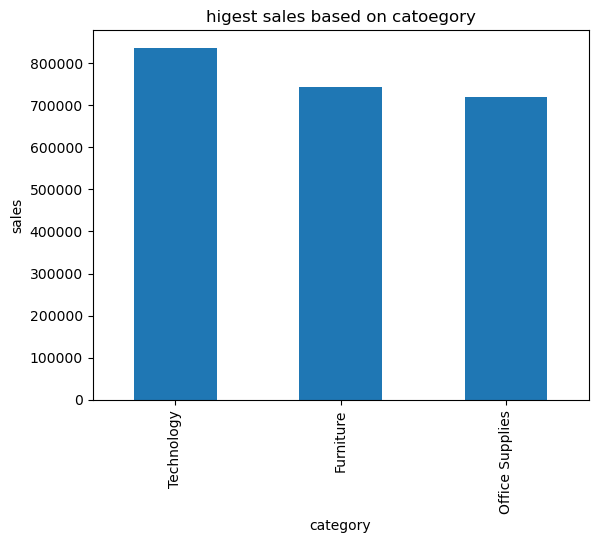

In [10]:
category_sales.plot(kind="bar",title="higest sales based on catoegory")
plt.ylabel("sales")
plt.show()

2. Which sub-categories are the most profitable?

In [31]:
sub_category_profit =(
    df.groupby('subcategory')['profit']
    .sum()
    .sort_values(ascending=False)
)
sub_category_profit.head(10)

subcategory
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Name: profit, dtype: float64

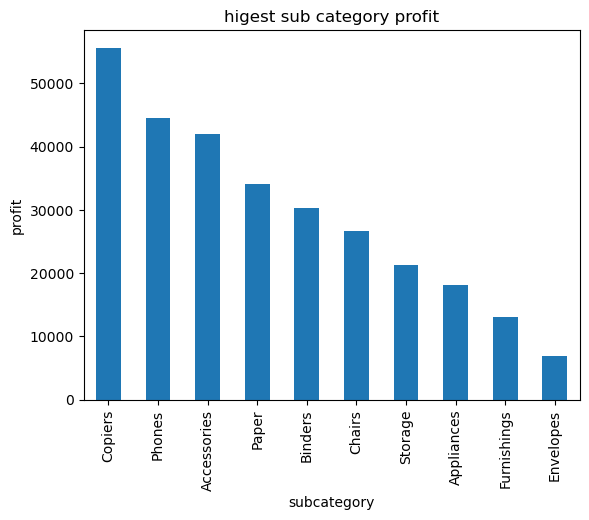

In [32]:
sub_category_profit.head(10).plot(kind='bar', title="higest sub category profit")
plt.ylabel('profit')
plt.show()

3. Which regions contribute the most to sales and profit?

In [46]:
region_profit=(
    df.groupby('region')[['sales','profit']]
    .sum()
    .sort_values(by='profit',ascending=False)
)
region_profit

,sales,profit
region,,
West,725457.8245,108418.4489
East,678781.2400,91522.7800
South,391721.9050,46749.4303
Central,501239.8908,39706.3625


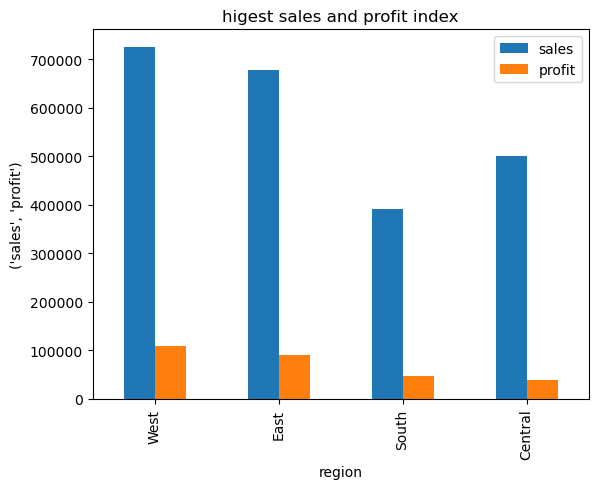

In [47]:
region_profit.plot(kind='bar',title="higest sales and profit index")
plt.ylabel(('sales',"profit"))
plt.show()